In [22]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [23]:
CashApp = ['TSLA','MSFT','GOOGL','AMZN','HD']
data = pd.DataFrame()

for stocks in CashApp:
    data[stocks] = wb.DataReader(stocks, data_source ='yahoo', start = '2010-07-16')['Adj Close']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2527 entries, 2010-07-16 to 2020-07-29
Data columns (total 5 columns):
TSLA     2527 non-null float64
MSFT     2527 non-null float64
GOOGL    2527 non-null float64
AMZN     2527 non-null float64
HD       2527 non-null float64
dtypes: float64(5)
memory usage: 118.5 KB


In [25]:
data.head()

,TSLA,MSFT,GOOGL,AMZN,HD
Date,,,,,
2010-07-16,20.639999,19.662710,230.035034,118.489998,21.434902
2010-07-19,21.910000,19.931303,233.323318,119.940002,21.403278
2010-07-20,20.299999,20.128799,241.036041,120.099998,22.083250
2010-07-21,20.219999,19.844406,238.988983,117.430000,21.719545
2010-07-22,21.000000,20.413197,242.647644,120.070000,22.312536


In [26]:
data.tail()

,TSLA,MSFT,GOOGL,AMZN,HD
Date,,,,,
2020-07-23,1513.069946,202.539993,1516.750000,2986.550049,263.809998
2020-07-24,1417.000000,201.300003,1508.209961,3008.909912,265.309998
2020-07-27,1539.599976,203.850006,1529.430054,3055.209961,267.420013
2020-07-28,1476.489990,202.020004,1503.650024,3000.330078,265.279999
2020-07-29,1499.109985,204.059998,1523.510010,3033.530029,264.660004


In [27]:
data.iloc[0]
# shows the first row at 2010-07-17

TSLA      20.639999
MSFT      19.662710
GOOGL    230.035034
AMZN     118.489998
HD        21.434902
Name: 2010-07-16 00:00:00, dtype: float64

In [28]:
returns = (data / data.shift(1)) - 1
returns.tail()
#simple return percentage for the latest results

,TSLA,MSFT,GOOGL,AMZN,HD
Date,,,,,
2020-07-23,-0.049776,-0.043495,-0.030738,-0.036569,-0.005129
2020-07-24,-0.063493,-0.006122,-0.005630,0.007487,0.005686
2020-07-27,0.086521,0.012668,0.014070,0.015388,0.007953
2020-07-28,-0.040991,-0.008977,-0.016856,-0.017963,-0.008002
2020-07-29,0.015320,0.010098,0.013208,0.011065,-0.002337


In [29]:
annual_returns = returns.mean()*250
print(annual_returns)

TSLA     0.571190
MSFT     0.263229
GOOGL    0.219572
AMZN     0.369842
HD       0.275376
dtype: float64


In [30]:
returns = np.log(data / data.shift(1))
returns

# log returns calculated
# tells me more about the behavior of each stock
# a stock that shows large deviations from its mean is more voltile

,TSLA,MSFT,GOOGL,AMZN,HD
Date,,,,,
2010-07-16,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.059712,0.013568,0.014194,0.012163,-0.001476
2010-07-20,-0.076322,0.009860,0.032521,0.001333,0.031275
2010-07-21,-0.003949,-0.014229,-0.008529,-0.022482,-0.016607
2010-07-22,0.037850,0.028259,0.015193,0.022232,0.026936
...,...,...,...,...,...
2020-07-23,-0.051058,-0.044469,-0.031220,-0.037254,-0.005142
2020-07-24,-0.065599,-0.006141,-0.005646,0.007459,0.005670
2020-07-27,0.082981,0.012588,0.013972,0.015270,0.007922


STATS OF POPULAR SECURITIES

In [31]:
print(returns[['TSLA','MSFT','GOOGL','AMZN','HD']].mean()) 
# daily average return

TSLA     0.001697
MSFT     0.000926
GOOGL    0.000748
AMZN     0.001284
HD       0.000995
dtype: float64


In [32]:
returns[['TSLA','MSFT','GOOGL','AMZN','HD']].mean()*250 
# annual rate of return

TSLA     0.424129
MSFT     0.231561
GOOGL    0.187108
AMZN     0.320928
HD       0.248755
dtype: float64

In [33]:
returns[['TSLA','MSFT','GOOGL','AMZN','HD']].std() 
# daily volatility of each stock

TSLA     0.034199
MSFT     0.015893
GOOGL    0.016076
AMZN     0.019717
HD       0.014600
dtype: float64

In [34]:
returns[['TSLA','MSFT','GOOGL','AMZN','HD']].std()*250**0.5 
#annual volatility of each stock

TSLA     0.540729
MSFT     0.251290
GOOGL    0.254190
AMZN     0.311759
HD       0.230850
dtype: float64

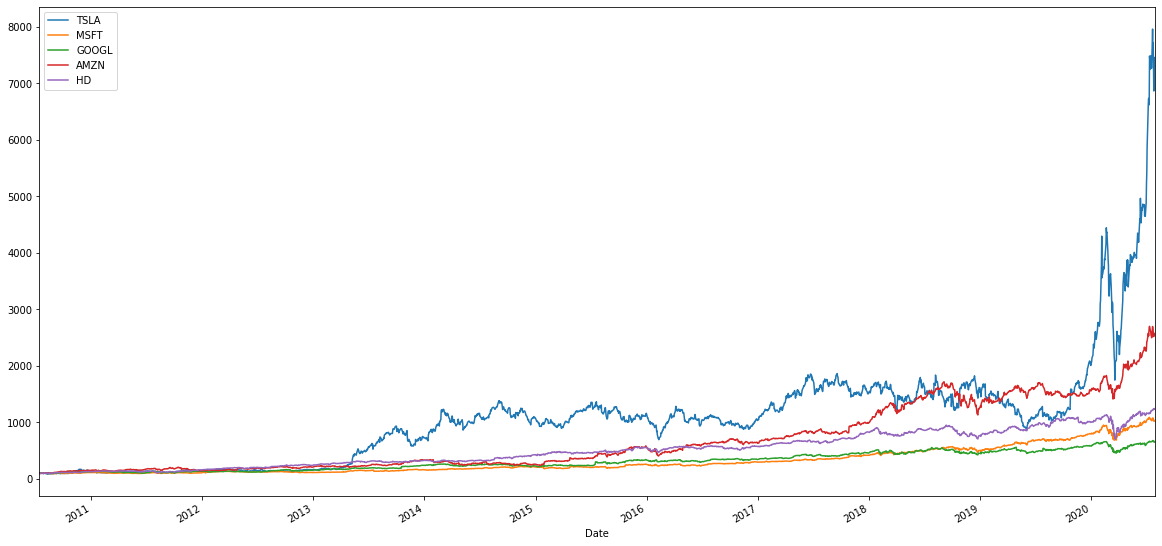

In [37]:
(data / data.iloc[0] * 100).plot(figsize=(20,10))
plt.show()

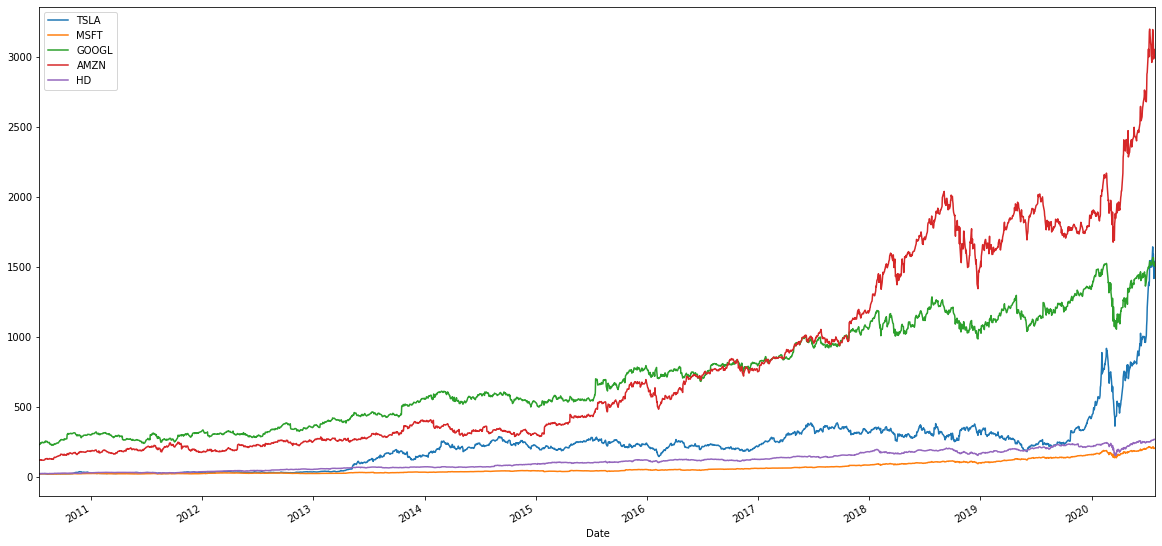

In [38]:
data.plot(figsize=(20,10))
plt.show()

# graph shows the share price of the fiver securities over the last decade